In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Fire_Department_Calls_for_Service.csv')

C:\Users\tongd_000\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (19,20,25,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [83]:
df.info

<bound method DataFrame.info of          Call Number Unit ID  Incident Number                      Call Type  \
0          191244131      86         19052974               Medical Incident   
1          191244120      79         19052973               Medical Incident   
2          191244111      76         19052972               Medical Incident   
3          191244091   AM118         19052971               Medical Incident   
4          191244091    QRV1         19052971               Medical Incident   
5          191244086      83         19052970               Medical Incident   
6          191244086     E43         19052970               Medical Incident   
7          191244044     E01         19052969               Medical Incident   
8          191244044    QRV1         19052969               Medical Incident   
9          191244044   AM120         19052969               Medical Incident   
10         191244017    KM03         19052968               Medical Incident   
11      

In [3]:
df.shape

(4951258, 43)

Set the date to datatime type

In [13]:
df['Received DtTm'] = pd.to_datetime(df['Received DtTm'])

In [49]:
df['On Scene DtTm'] = pd.to_datetime(df['On Scene DtTm'])

In [ ]:
df['Received hr'] = df['Received DtTm'].dt.hour

Find out which call type is the most popular by hours

In [22]:
Calltype = df.groupby(['Call Type','Received hr'])['Incident Number'].count().sort_values(ascending=False).unstack(level=-1)

In [23]:
Calltype.fillna(0,inplace = True)

In [32]:
Calltype['Total']=Calltype.sum(axis =1, skipna = True)

In [38]:
Calltype_top5 = Calltype.sort_values(by='Total',ascending=False).head()

In [42]:
Calltype_top5.drop(['Total'],axis=1,inplace = True)

Time distribution of top 5 popular call types

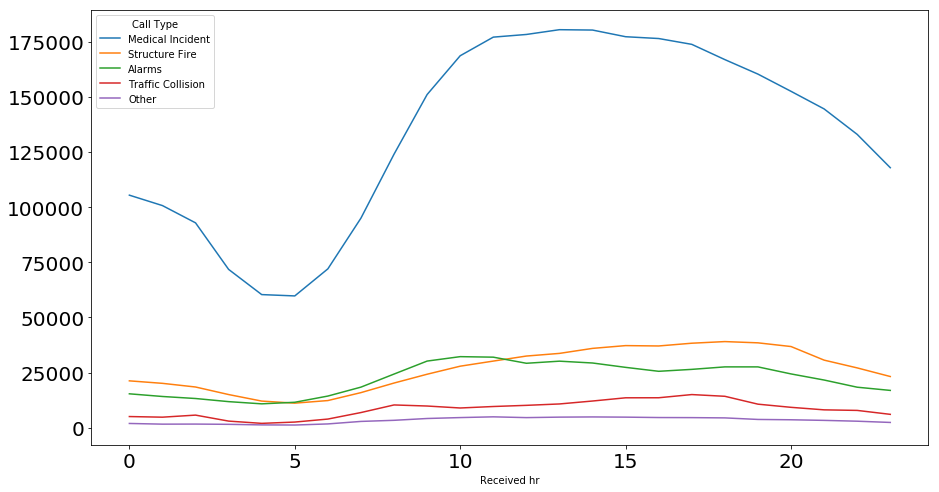

In [81]:
Calltype_top5.transpose().plot(figsize=(15,8),fontsize=14)

In [69]:
df['RS_time'] = np.abs(-df['On Scene DtTm'].dt.minute+df['Received DtTm'].dt.minute)

In [73]:
dfRS = df.dropna(subset = ['RS_time'])

The average time between call received to on scene time for top 10 categories.

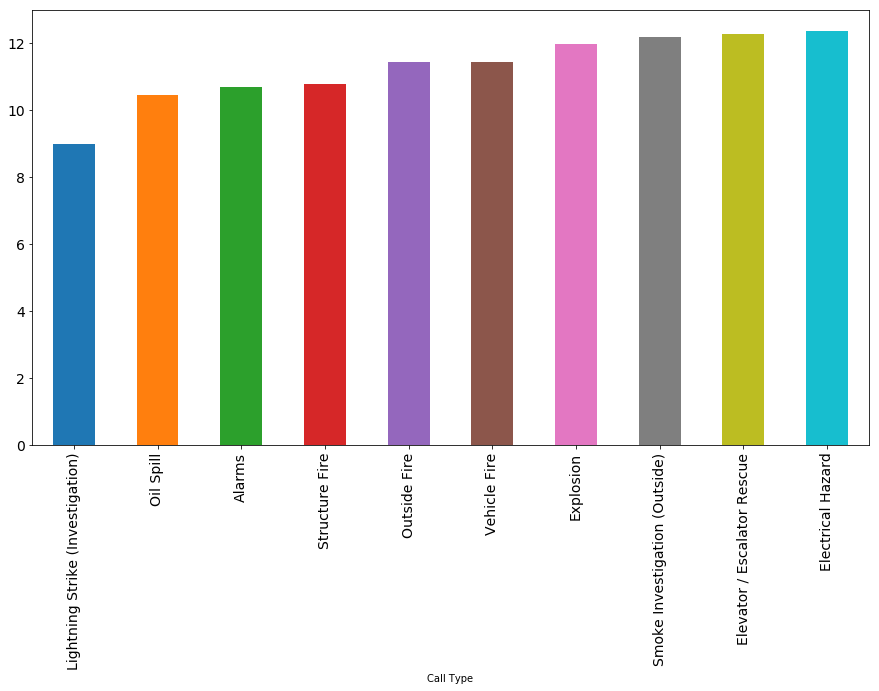

In [82]:
dfRS.groupby(['Call Type'])['RS_time'].mean().sort_values().head(10).plot(kind='bar',figsize=(15,8),fontsize=14)